In [1]:
#read data,e.g.lc_Bessell_B & I
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

raw_df_1=pd.read_csv('lc_Bessell_V_5404A.txt',delimiter='\s+',header=None)
raw_df_2=pd.read_csv('lc_Bessell_B_4369A.txt',delimiter='\s+',header=None)
df_1=raw_df_1.iloc[:,1:4]
df_2=raw_df_2.iloc[:,1:4]
#print(df_1)
df_1.rename(columns={1:'time',2:'flux',3:'error'},inplace=True)
df_2.rename(columns={1:'time',2:'flux',3:'error'},inplace=True)

#optional
#df_1=df_1[df_1.time>2455500]
#df_2=df_2[df_2.time>2455500]

In [2]:
#calculate the creosspoint of two lines
def pointof2lines(k1,b1,k2,b2):
    k=np.array([[k1,-1],[k2,-1]])
    b=np.array([[b1],[b2]])
    point=inv(k).dot(b)
    x=point[0][0]
    y=point[1][0]
    return -x,-y

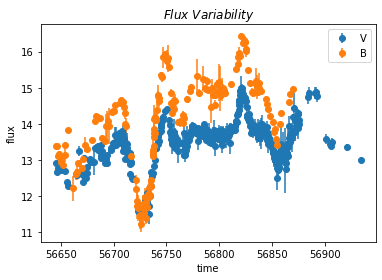

In [4]:
time_1=df_1.time.tolist()
time_2=df_2.time.tolist()
flx_1=df_1.flux.tolist()
flx_2=df_2.flux.tolist()
err_1=df_1.error.tolist()
err_2=df_2.error.tolist()
plt.errorbar(x=time_1,y=flx_1,yerr=err_1,fmt='o',label='V')
plt.errorbar(x=time_2,y=flx_2,yerr=err_2,fmt='o',label='B')
plt.xlabel('time')
plt.ylabel('flux')
plt.title('$Flux\ Variability$')
plt.legend()
plt.show()

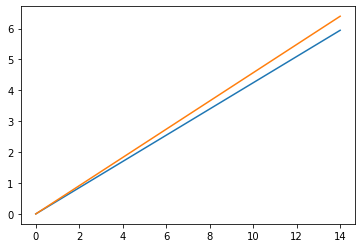

In [5]:
#host-galaxy color
v=np.arange(0,15)
k1=10**(-2/5*(0.89+0.04))
k2=10**(-2/5*(0.89-0.04))
b1=k1*v
b2=k2*v
plt.plot(v,b1)
plt.plot(v,b2)
plt.show()

Slope is: 1.512914481523064
upper: (5.623409950293278, 2.570394273641829)
lower: (5.45563888961104, 2.3165710063551863)
theoretical value: (5.013000000000001, 2.2319999999999998)


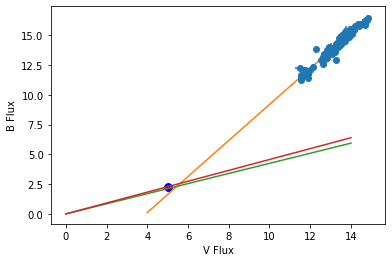

In [6]:
#set bar 
time_max=max(np.max(time_1),np.max(time_2))
time_min=min(np.min(time_1),np.min(time_2))
bar=1
n=int((time_max-time_min)/bar)

time=np.arange(time_min+bar/2,time_max+bar/2,bar)
flx_1=[]
flx_2=[]
err_1=[]
err_2=[]
for i in range(n):
    tmp_df_1=df_1[(df_1.time>(time_min+i*bar)) & (df_1.time<(time_min+i*bar+bar))]
    flx_1.append(np.mean(tmp_df_1.flux))
    err_1.append(np.mean(tmp_df_1.error))
    tmp_df_2=df_2[(df_2.time>(time_min+i*bar)) & (df_2.time<(time_min+i*bar+bar))]
    flx_2.append(np.mean(tmp_df_2.flux))
    err_2.append(np.mean(tmp_df_2.error))

data=pd.DataFrame([time,flx_1,err_1,flx_2,err_2])
data=data.T
data=data.dropna(how='any')
data.columns=['time','flux_1','error_1','flux_2','error_2']
#print(data)  optional
#it is surprising that plt can support series !!! series vs list(1-dimensional)???
plt.errorbar(x=data.flux_1,y=data.flux_2,xerr=data.error_1,yerr=data.error_2,fmt='o')
#regression analysis
z=np.polyfit(data.flux_1,data.flux_2,1)
f=np.poly1d(z)
x=np.arange(4,15,0.1)
y=f(x)
plt.plot(x,y)
plt.plot(v,b1)
plt.plot(v,b2)
plt.xlabel('V Flux')
plt.ylabel('B Flux')

print("Slope is:",z[0] )
#e.g scipy.stats
#calculate the crossover point######################################################
point1=pointof2lines(k1,0,z[0],z[1])
point2=pointof2lines(k2,0,z[0],z[1])
print("upper:",point2)
print("lower:",point1)
############################################################
b_upper=2.07+0.08+0.162
b_lower=2.07-0.08+0.162

v_upper=4.23+0.04+0.783
v_lower=4.23-0.04+0.783

#p1=[4.23+0.783,b_lower]
#p2=[4.23+0.783,b_upper]
#p3=[v_lower,2.07+0.162]
#p4=[v_upper,2.07+0.162]
x = [[4.23+0.783,4.23+0.783],[v_lower, v_upper]] 
y = [[b_lower, b_upper],[2.07+0.162, 2.07+0.162]]

for i in range(len(x)):
    plt.plot(x[i], y[i], color='r')
    plt.scatter(x[i], y[i], color='b')
print("theoretical value:",((v_lower+v_upper)/2,(b_lower+b_upper)/2))

#plt.text(4,15,string,ha='left',wrap=True)

plt.show()

time interval: 223.0


C:\Users\sunqi008\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


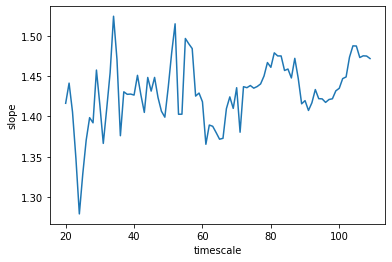

In [7]:
#working on different time scales ! based on 'data'!!!
print("time interval:",np.max(data.time)-np.min(data.time))
#timescale=50
t=np.arange(20,110)
mean=[]
for timescale in t:
    n=int((time_max-time_min)/timescale)
    slope=[]
    for i in range(n):
        tmp_data=data[(data.time>(np.min(data.time)+i*timescale))&(data.time<(np.min(data.time)+i*timescale+timescale))]
        if len(tmp_data['flux_1'])==0 | len(tmp_data['flux_2'])==0:
            continue
        z=np.polyfit(tmp_data['flux_1'],tmp_data['flux_2'],1)
        if z[0]>1.6 or z[0]<1.2:
            continue
        slope.append(z[0])
    #print(len(slope))
    #print(np.mean(slope))
    mean.append(np.mean(slope))
plt.xlabel("timescale")
plt.ylabel("slope")
plt.plot(t,mean)
plt.show()

$$$$$$$$$$$$$$$$$$%%%%%  TIMESCALE IS 20 %%%%%%%%%%%%%$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
slope : -1.6641778338380386
upper: (16.089333443280776, 7.354244295699273)
lower: (16.339428806948256, 6.93804113513819)
theoretical value: (5.013000000000001, 2.2319999999999998)


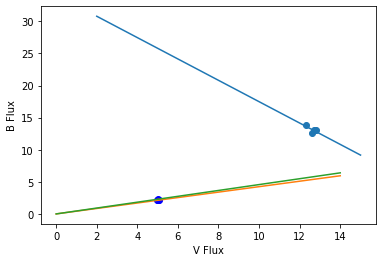

slope : 1.232718586131845
upper: (3.2102005824557747, 1.4673447725353275)
lower: (3.081217873442143, 1.308345389844588)
theoretical value: (5.013000000000001, 2.2319999999999998)


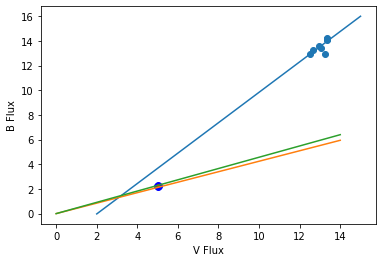

slope : 1.4154735610299451
upper: (4.903336239312354, 2.2412570847002935)
lower: (4.7426621245084455, 2.0138271232534697)
theoretical value: (5.013000000000001, 2.2319999999999998)


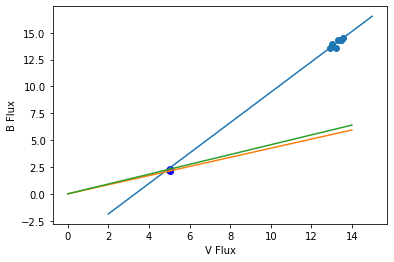

slope : 1.5133867755577384
upper: (5.696263696054879, 2.6036948603986616)
lower: (5.526392807508473, 2.3466145041202875)
theoretical value: (5.013000000000001, 2.2319999999999998)


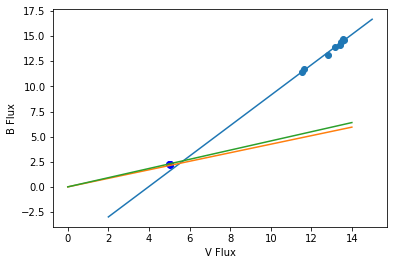

slope : 1.573720166844958
upper: (5.924301154069558, 2.707928089246969)
lower: (5.756905961660733, 2.444494899120309)
theoretical value: (5.013000000000001, 2.2319999999999998)


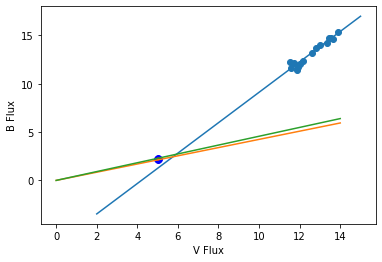

slope : 1.6800886920423597
upper: (6.768860304852295, 3.0939661025009264)
lower: (6.59380574833418, 2.7998589216043506)
theoretical value: (5.013000000000001, 2.2319999999999998)


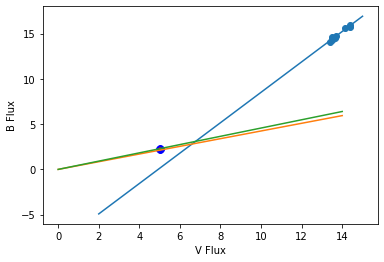

slope : 1.2458275507068388
upper: (2.6511881023290687, 1.2118267700220902)
lower: (2.54636638181581, 1.0812369826941794)
theoretical value: (5.013000000000001, 2.2319999999999998)


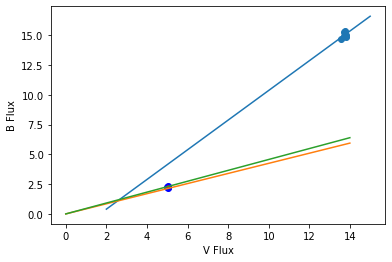

slope : 1.110231068589235
upper: (0.4944230296134275, 0.2259949275099033)
lower: (0.4710085504780525, 0.1999994453189755)
theoretical value: (5.013000000000001, 2.2319999999999998)


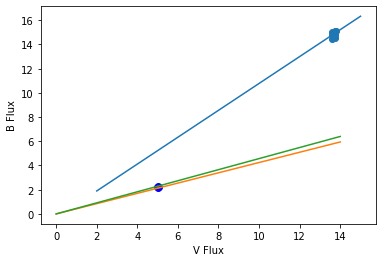

slope : 1.0723955282665683
upper: (-0.6745129885820651, -0.30831192082269504)
lower: (-0.6407042168135177, -0.2720555451619198)
theoretical value: (5.013000000000001, 2.2319999999999998)


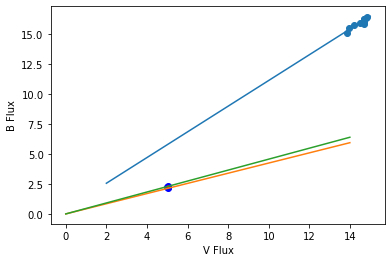

slope : 1.4328123478599812
upper: (4.985042642551642, 2.2786041166368824)
lower: (4.82450044656952, 2.0485772758811414)
theoretical value: (5.013000000000001, 2.2319999999999998)


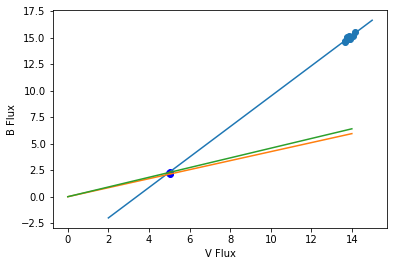

slope : 1.1132153036291403
upper: (1.0829913267145694, 0.49502254489657416)
lower: (1.0319261836081202, 0.4381760461084628)
theoretical value: (5.013000000000001, 2.2319999999999998)


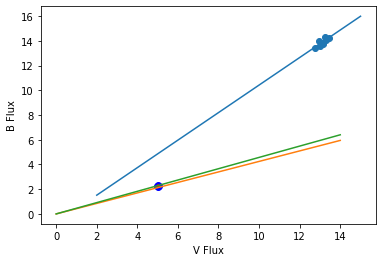

slope : 1.4999999999999867
upper: (5.376053798766971, 2.457330698150567)
lower: (5.213736285341886, 2.21385442801294)
theoretical value: (5.013000000000001, 2.2319999999999998)


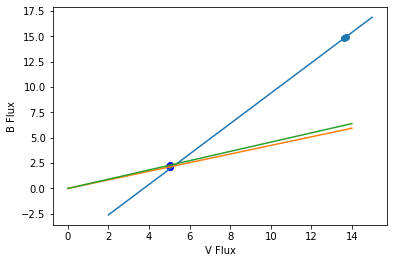

TypeError: expected non-empty vector for x

In [8]:
#we attention that when we work on data regression analysis, we do not use data in 'time'
#'error' section. IN ANOTHER WORDS, we ONLY care about 2 flux values in different bands.
#So, in this part, we can shorten our 'database'--data

import math
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

data_reg=data.iloc[:,[1,3]]

for timescale in t:
    n=int((time_max-time_min)/timescale)
    print("$$$$$$$$$$$$$$$$$$%%%%%  TIMESCALE IS {} %%%%%%%%%%%%%$$$$$$$$$$$$$$$$$$$$$$$$$$$$$".format(timescale))
    #slope=[]
    for i in range(n):
        tmp_data=data[(data.time>(np.min(data.time)+i*timescale)) & (data.time<(np.min(data.time)+i*timescale+timescale))]
        data_reg=tmp_data.iloc[:,[1,3]]
        z=np.polyfit(data_reg.flux_1,data_reg.flux_2,1)
        plt.scatter(data_reg.flux_1,data_reg.flux_2)
        #########################################
        f=np.poly1d(z)
        f_v=np.arange(2,16)
        f_b=f(f_v)
        plt.plot(f_v,f_b)
        plt.xlabel('V Flux')
        plt.ylabel('B Flux')
        print('slope :',z[0])
        ########################################
        point1=pointof2lines(k1,0,z[0],z[1])
        point2=pointof2lines(k2,0,z[0],z[1])
        print("upper:",point2)
        print("lower:",point1)
        ##########################################
        for i in range(len(x)):
            plt.plot(x[i], y[i], color='r')
            plt.scatter(x[i], y[i], color='b')
        print("theoretical value:",((v_lower+v_upper)/2,(b_lower+b_upper)/2))
        plt.plot(v,b1)
        plt.plot(v,b2)
        plt.show()
        